In [4]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [5]:
agg_file_path <- file.path("../../4.processing_profiled_features/data/aggregated/live_cell_pyroptosis_wave1_first_time_norm_fs_agg.parquet")

agg_df <- arrow::read_parquet(agg_file_path)
agg_df$unique_group <- paste(agg_df$Metadata_Well, agg_df$Metadata_FOV, sep="_")
head(agg_df)

Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,⋯,Nuclei_Texture_InfoMeas2_BF_3_03_256,Nuclei_Texture_InverseDifferenceMoment_CL488_3_00_256,Nuclei_Texture_InverseDifferenceMoment_CL561_3_01_256,Nuclei_Texture_InverseDifferenceMoment_DNA_3_00_256,Nuclei_Texture_InverseDifferenceMoment_GSDM_3_01_256,Nuclei_Texture_SumAverage_BF_3_03_256,Nuclei_Texture_SumAverage_CL488_3_01_256,Nuclei_Texture_SumAverage_CL561_3_03_256,Nuclei_Texture_SumAverage_GSDM_3_00_256,unique_group
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,-0.03723016,-0.1565484,0.5829113,-0.7177516,0.5797010,0.6735341,-0.07735536,0.2007679,-0.2347814,N11_0002
Ab1-42 0.4 uM,N11,668,0003,Ab1-42,01,NA,0.4,uM,NA,⋯,-0.03723016,-0.1565484,0.5829113,-0.7177516,0.5797010,0.6735341,-0.07735536,0.2007679,-0.2347814,N11_0003
Ab1-42 0.4 uM,N11,573,0004,Ab1-42,01,NA,0.4,uM,NA,⋯,-0.03723016,-0.1565484,0.5829113,-0.7177516,0.5797010,0.6735341,-0.07735536,0.2007679,-0.2347814,N11_0004
Ab1-42 0.4 uM,N11,628,0001,Ab1-42,01,NA,0.4,uM,NA,⋯,-0.03723016,-0.1565484,0.5829113,-0.7177516,0.5797010,0.6735341,-0.07735536,0.2007679,-0.2347814,N11_0001
Ab1-42 0.4 uM,N11,582,0005,Ab1-42,01,NA,0.4,uM,NA,⋯,-0.03723016,-0.1565484,0.5829113,-0.7177516,0.5797010,0.6735341,-0.07735536,0.2007679,-0.2347814,N11_0005
Ab1-42 0.4 uM,N11,674,0002,Ab1-42,02,NA,0.4,uM,NA,⋯,-0.01450366,-0.1734799,0.5781949,-0.6461717,0.5962951,0.6836184,-0.06706072,0.1985007,-0.2320199,N11_0002


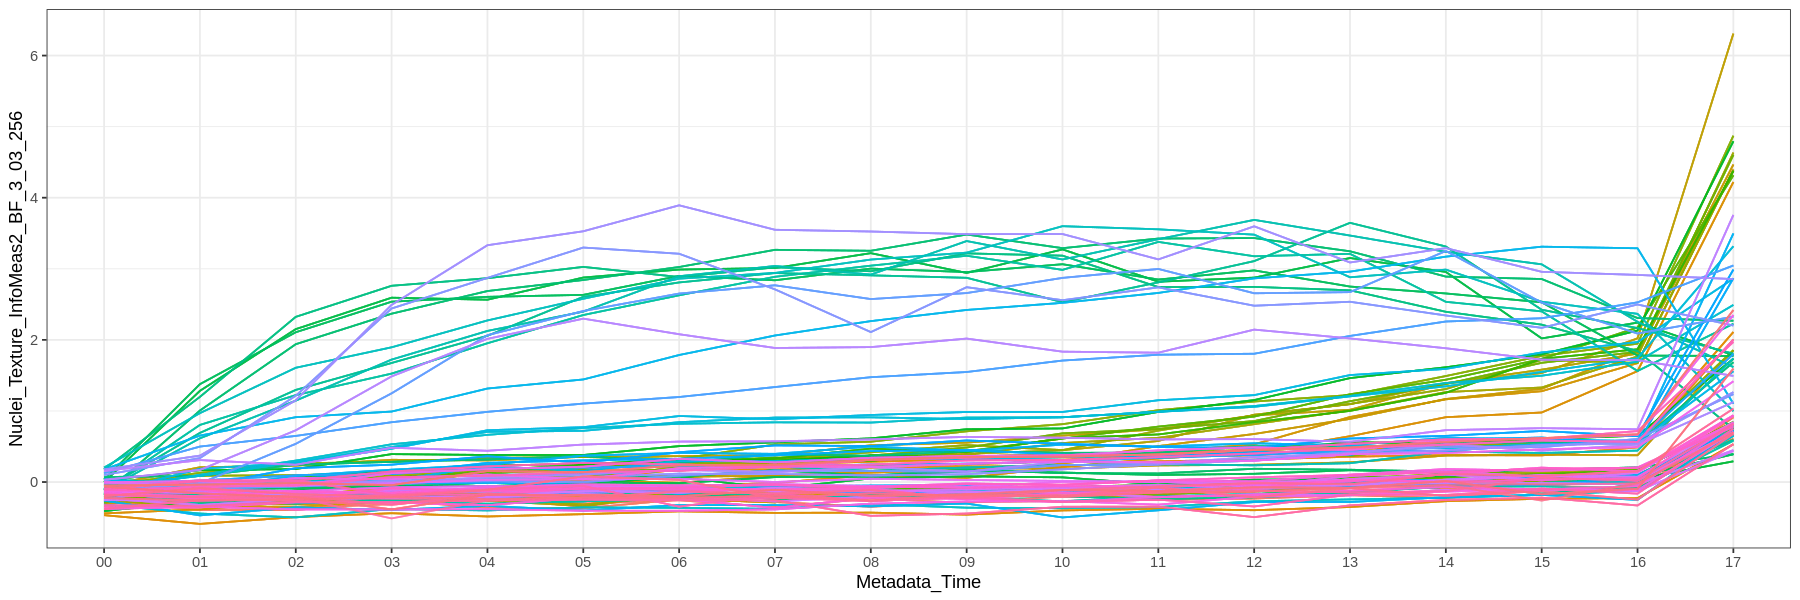

In [25]:
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
timelapse_plot <- (
    # group the timepoints by the feature
    ggplot(agg_df, aes(x=Metadata_Time, y=Nuclei_Texture_InfoMeas2_BF_3_03_256), fill=Metadata_Well)
    + geom_line(aes(group=unique_group, color=Metadata_Well), alpha=0.5)
    + theme_bw()
    + theme(legend.position = "none")
    # + facet_wrap(~unique_group)
)
timelapse_plot